In [4]:
%matplotlib inline

In [5]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [6]:
save_dir_root = '../data/ldle/barbell/'

In [7]:
X, labelsMat, ddX = datasets.Datasets().barbell()

X.shape =  (10227, 2)


# LDLE

In [8]:
ldle_obj = ldle.LDLE(X=X, eta_min=10, max_iter0=20,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2556 points processed...
A_k, Atilde_k: 5112 points processed...
A_k, Atilde_k: 7668 points processed...
A_k, Atilde_k: 10224 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2556 points processed...
local_param: 5112 points processed...
local_param: 7668 points processed...
local_param: 10224 points processed...
local_param: all 10227 points processed...
After iter 1, max distortion is 12.731982
After iter 2, max distortion is 10.469529
After iter 3, max distortion is 10.469529
After iter 4, max distortion is 10.469529
After iter 5, max distortion is 10.430429
After iter 6, max distortion is 10.398350
After iter 7, max distortion is 10.398350
After iter 8, max distortion is 10.398350
After iter 9, max distortion is 10.398350
After iter 10, max distortion is 10.398350
After iter 11, max distortion is 10.398350
After it

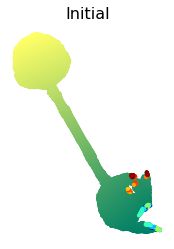

###############
Took 7.5 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0002895155952732264


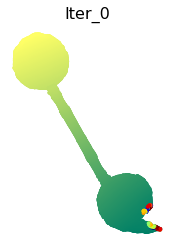

Iteration: 1
error: 0.00028945096930563566
Iteration: 2
error: 0.0002971130030003789
Iteration: 3
error: 0.00030327070054804835
Iteration: 4
error: 0.0003065324536436776
Iteration: 5
error: 0.00030462026565134816


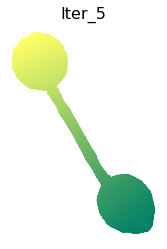

Iteration: 6
error: 0.000300382559560865
Iteration: 7
error: 0.0002981719900740783
Iteration: 8
error: 0.00029627678076025993
Iteration: 9
error: 0.00029449144762389224
Iteration: 10
error: 0.0002929361792483797


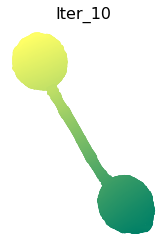

Iteration: 11
error: 0.0002924478380835661
Iteration: 12
error: 0.0002911145490873815
Iteration: 13
error: 0.0002904763104387018
Iteration: 14
error: 0.0002894249762013274
Iteration: 15
error: 0.00028838379490997


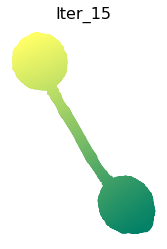

Iteration: 16
error: 0.0002878861957221379
Iteration: 17
error: 0.00028698958497627686
Iteration: 18
error: 0.000286208700509797
Iteration: 19
error: 0.0002854788766893653


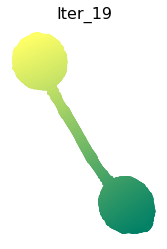

###############
Took 301.5 seconds to refine global embedding.
###############
###############
Took 310.4 seconds to perform step 3: compute global embedding.
###############


In [9]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [10]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [11]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [12]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=12, n_components=2, n_jobs=-1, random_state=42)

In [13]:
y_ltsa = ltsa_obj.fit_transform(X)

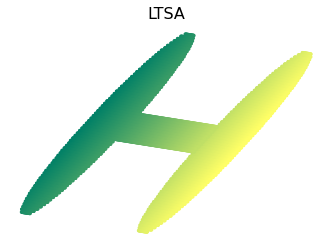

In [14]:
vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA')

# UMAP

In [15]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [23]:
umap_obj = UMAP(n_neighbors=200, min_dist=0.05, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [24]:
y_umap = umap_obj.fit_transform(X)

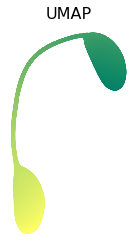

In [25]:
vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP')

# t-SNE

In [19]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [29]:
tsne_obj = TSNE(perplexity=40, early_exaggeration=6, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [30]:
y_tsne = tsne_obj.fit_transform(X)

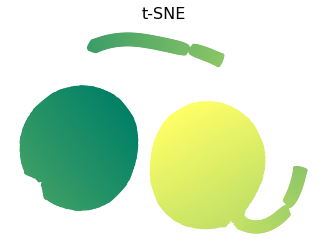

In [31]:
vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE')